In [1]:
#Importing libraries
import sys, os
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
import tensorflow as tf


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\tensorf

In [2]:
#the csv can be found here
#  https://www.kaggle.com/deadskull7/fer2013
##


#reading the data
with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [3]:
#Const varaibles
img_size = 48
num_features = 64
num_labels = 7
batch_size = 64
epochs = 2
width, height = 48, 48

In [4]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [5]:
#transfer train and test set data from the csv
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")    
        val = img.split(" ")        
        pixels = np.array(val, 'float32')
    
        if 'Training' in usage:
            y_train.append(np.array(emotion, 'float32'))
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(np.array(emotion, 'float32'))
            x_test.append(pixels)
    except:
        print("",end="")

In [6]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

In [7]:
#converting to categorical [7 categories]
y_train=np_utils.to_categorical(y_train, num_classes=num_labels)
y_test=np_utils.to_categorical(y_test, num_classes=num_labels)

In [8]:
#normalizing data between oand 1
x_train -= np.mean(x_train, axis=0)
x_train /= np.std(x_train, axis=0)
x_test -= np.mean(x_test, axis=0)
x_test /= np.std(x_test, axis=0)

In [9]:
#reshaping data for CNN
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

# CNN 

In [10]:
#Creating the model architecture

model = Sequential()

# 1 - conv
model.add(Conv2D(64, (3,3), padding='same', input_shape=(img_size, img_size, 1))) #1 because it is grey scale and not RGB
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

# 2- conv layer
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

# 3- conv layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

# 4- conv layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)) 

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)) 

model.add(Dense(num_labels, activation='softmax'))

opt = Adam(lr=0.0006) #learninng rate to high will make the model slow to process 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)     

In [11]:
##if model saved previously skip this code

#Training the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          shuffle=True)


Train on 28709 samples, validate on 3589 samples
Epoch 1/2
28709/28709 [==============================] - 872s 30ms/step - loss: 1.7358 - accuracy: 0.3371 - val_loss: 1.7077 - val_accuracy: 0.3617
Epoch 2/2
28709/28709 [==============================] - 782s 27ms/step - loss: 1.4046 - accuracy: 0.4623 - val_loss: 1.3112 - val_accuracy: 0.4921


In [12]:
#saving the model
model.save("model.h5")

In [11]:
#if already have saved model just load it
from keras.models import load_model

model = tf.keras.models.load_model("model.h5")

In [12]:
#deducing prediction belongs to which class and plotting them
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'Fear','happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
    return emotions

In [13]:
from keras.preprocessing import image
from IPython.display import display 
from PIL import Image
import matplotlib.pyplot as plt

C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


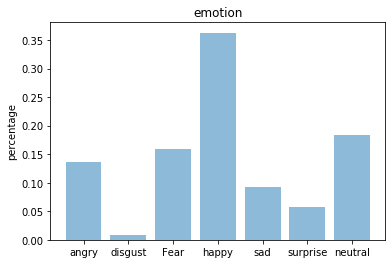

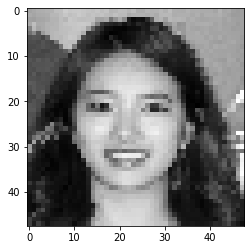

In [14]:
#loading suzy image to test
img = image.load_img("19.jpg", grayscale=True, target_size=(48, 48))
 
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
 
x /= 255
 
custom = model.predict(x)

emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

# Performance Metrics

In [15]:
#plotting matrix function
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
#validating model with the testing class from csv
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

In [18]:
#accuracy
from sklearn import metrics

y_compare = np.argmax(y_test, axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))

Accuracy score: 0.48843689049874617


Confusion Matrix
[[256   3  19  40  80  24  45]
 [ 29   5   3   9   7   0   3]
 [133   5  50  35 124  90  59]
 [ 66   4   9 626  79  42  69]
 [179   3  24  54 259  25 109]
 [ 35   0  11  18  17 314  20]
 [129   0  18  43 133  41 243]]
Classification Report
              precision    recall  f1-score   support

       angry       0.31      0.55      0.40       467
     disgust       0.25      0.09      0.13        56
        fear       0.37      0.10      0.16       496
       happy       0.76      0.70      0.73       895
         sad       0.37      0.40      0.38       653
    surprise       0.59      0.76      0.66       415
     neutral       0.44      0.40      0.42       607

    accuracy                           0.49      3589
   macro avg       0.44      0.43      0.41      3589
weighted avg       0.50      0.49      0.47      3589

Overall Accuracy
0.48843689049874617


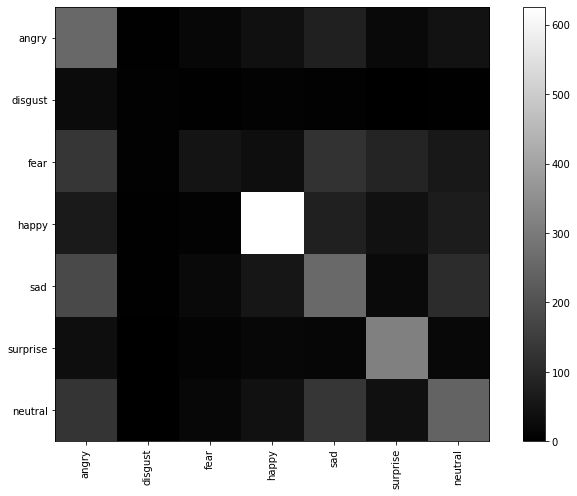

In [19]:
# Evaluate model with confusion matrix, classification report and accuracy score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print('Confusion Matrix')
print(confusion_matrix(y_compare,pred))
print('Classification Report')
target_names = classes
print(classification_report(y_compare,pred, target_names=target_names))
print('Overall Accuracy')
print(accuracy_score(y_compare,pred))

plt.figure(figsize=(12,8))
cnf_matrix = confusion_matrix(y_compare, pred)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

# ROC Curve

In [22]:
y_probas_0 = model.predict_proba(x_test)[:,0]
y_probas_1 = model.predict_proba(x_test)[:,1]
y_probas_2 = model.predict_proba(x_test)[:,2]
y_probas_3 = model.predict_proba(x_test)[:,3]
y_probas_4 = model.predict_proba(x_test)[:,4]
y_probas_5 = model.predict_proba(x_test)[:,5]
y_probas_6 = model.predict_proba(x_test)[:,6]

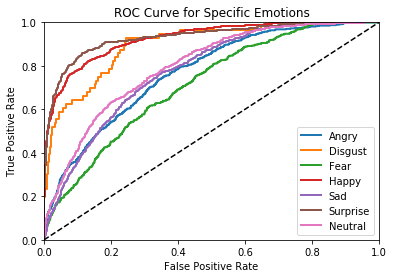

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

# Plot an ROC curve
fpr, tpr, thresholds = roc_curve(y_compare, y_probas_0, pos_label=0)
fpr2, tpr2, thresholds2 = roc_curve(y_compare, y_probas_1, pos_label=1)
fpr3, tpr3, thresholds3 = roc_curve(y_compare, y_probas_2, pos_label=2)
fpr4, tpr4, thresholds3 = roc_curve(y_compare, y_probas_3, pos_label=3)
fpr5, tpr5, thresholds5 = roc_curve(y_compare, y_probas_4, pos_label=4)
fpr6, tpr6, thresholds6 = roc_curve(y_compare, y_probas_5, pos_label=5)
fpr7, tpr7, thresholds7 = roc_curve(y_compare, y_probas_6, pos_label=6)

plt.title('ROC Curve for Specific Emotions')
plt.plot(fpr, tpr, linewidth=2, label='ROC curve')
plt.plot(fpr2, tpr2, linewidth=2, label='ROC curve')
plt.plot(fpr3, tpr3, linewidth=2, label='ROC curve')
plt.plot(fpr4, tpr4, linewidth=2, label='ROC curve')
plt.plot(fpr5, tpr5, linewidth=2, label='ROC curve')
plt.plot(fpr6, tpr6, linewidth=2, label='ROC curve')
plt.plot(fpr7, tpr7, linewidth=2, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], loc='lower right')
plt.show()

# Testing with Suzy's pictures

In [20]:
def curr_emotion_analysis(emotions):
    my_dict = dict({0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'})

    return my_dict.get(emotions)

In [21]:
pred = []
arr = []
for i in range(40):
    img = image.load_img("validation_suzy/suzy/" + str(i+1) +".JPG", grayscale=True, target_size=(48, 48))
 
    i = image.img_to_array(img)
    i = np.expand_dims(i, axis = 0)
    i /= 255
    custom = model.predict_classes(i)

    a = curr_emotion_analysis(custom[0])

    #i = np.array(i, 'float32')
    #i = i.reshape([48, 48]);
    
    arr.append(a)
    print(a)

C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\keras_preprocessing\image\utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Fear
Fear
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Neutral
Fear
Neutral
Fear
Neutral
Neutral
Neutral
Fear
Neutral
Happy
Angry
Happy
Neutral
Fear
Fear
Fear
Neutral
Happy
Angry
Happy
Angry


In [22]:
pred = arr
pred

['Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Neutral',
 'Fear',
 'Neutral',
 'Fear',
 'Neutral',
 'Neutral',
 'Neutral',
 'Fear',
 'Neutral',
 'Happy',
 'Angry',
 'Happy',
 'Neutral',
 'Fear',
 'Fear',
 'Fear',
 'Neutral',
 'Happy',
 'Angry',
 'Happy',
 'Angry']

In [23]:
# Adding actual data
actual=[]

for i in range(20):
    actual.append('Happy')

for i in range(20):
    actual.append('Sad')

In [24]:
# Getting the confusion matrix
print(confusion_matrix(actual, pred))
print(classification_report(actual, pred))
print(accuracy_score(actual, pred))

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  2 17  1  0]
 [ 0  0  0  0  0]
 [ 3  6  4  7  0]]
              precision    recall  f1-score   support

       Angry       0.00      0.00      0.00         0
        Fear       0.00      0.00      0.00         0
       Happy       0.81      0.85      0.83        20
     Neutral       0.00      0.00      0.00         0
         Sad       0.00      0.00      0.00        20

    accuracy                           0.42        40
   macro avg       0.16      0.17      0.17        40
weighted avg       0.40      0.42      0.41        40

0.425


C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\.conda\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
